# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [3]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

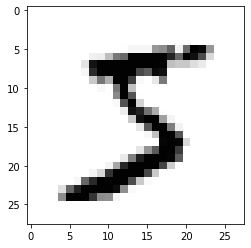

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [7]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [8]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [9]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [10]:
model = keras.models.Sequential()

# reshape(-1, 28*28)
model.add(keras.layers.Flatten(input_shape=(28, 28)))

model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [12]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [15]:
print(model.layers[1])
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [17]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [18]:
weights

array([[-0.03703096,  0.01505364,  0.02422893, ...,  0.06605117,
        -0.05832141, -0.05438862],
       [-0.01809431,  0.02408525, -0.04081807, ...,  0.03063899,
        -0.0423815 ,  0.02567116],
       [ 0.07131575,  0.07258727, -0.01281995, ...,  0.00667768,
        -0.05181305,  0.01195982],
       ...,
       [ 0.02387783, -0.04138074, -0.03394711, ..., -0.07433589,
        -0.03203893,  0.0415445 ],
       [ 0.03255668,  0.06576119,  0.0445011 , ..., -0.04263898,
        -0.06218193, -0.04230883],
       [-0.00788664, -0.06935962, -0.03726583, ...,  0.06111574,
         0.0356935 ,  0.0426139 ]], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [21]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [22]:
# Equivalente
model.compile(optimizer="sgd",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"]
             )

In [23]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [24]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 15,
    validation_data = (X_val, y_val)
)

Epoch 1/15
782/782 [==============================] - 3s 3ms/step - loss: 1.3148 - accuracy: 0.6669 - val_loss: 0.3879 - val_accuracy: 0.8993
Epoch 2/15
782/782 [==============================] - 2s 2ms/step - loss: 0.3889 - accuracy: 0.8928 - val_loss: 0.3004 - val_accuracy: 0.9154
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3181 - accuracy: 0.9096 - val_loss: 0.2654 - val_accuracy: 0.9255
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2819 - accuracy: 0.9206 - val_loss: 0.2433 - val_accuracy: 0.9310
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2560 - accuracy: 0.9272 - val_loss: 0.2212 - val_accuracy: 0.9380
Epoch 6/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2317 - accuracy: 0.9346 - val_loss: 0.2052 - val_accuracy: 0.9428
Epoch 7/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2184 - accuracy: 0.9392 - val_loss: 0.1941 - val_accuracy: 0.9450
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [25]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 15,
    validation_data = (X_val, y_val)
)

Epoch 1/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1233 - accuracy: 0.9649 - val_loss: 0.1278 - val_accuracy: 0.9645
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1173 - accuracy: 0.9671 - val_loss: 0.1273 - val_accuracy: 0.9654
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1122 - accuracy: 0.9687 - val_loss: 0.1222 - val_accuracy: 0.9656
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1071 - accuracy: 0.9696 - val_loss: 0.1181 - val_accuracy: 0.9679
Epoch 5/15
782/782 [==============================] - 3s 3ms/step - loss: 0.1025 - accuracy: 0.9716 - val_loss: 0.1156 - val_accuracy: 0.9672
Epoch 6/15
782/782 [==============================] - 3s 3ms/step - loss: 0.0983 - accuracy: 0.9729 - val_loss: 0.1129 - val_accuracy: 0.9684
Epoch 7/15
782/782 [==============================] - 2s 3ms/step - loss: 0.0942 - accuracy: 0.9739 - val_loss: 0.1088 - val_accuracy: 0.9693
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [28]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.840785026550293,
  0.37122276425361633,
  0.3089354932308197,
  0.27388930320739746,
  0.24819378554821014,
  0.22732754051685333,
  0.2102602869272232,
  0.19529199600219727,
  0.1825505644083023,
  0.17119699716567993,
  0.1612524539232254,
  0.1520371437072754,
  0.14422869682312012,
  0.13639794290065765,
  0.12947070598602295],
 'accuracy': [0.8001999855041504,
  0.8969600200653076,
  0.9124600291252136,
  0.9223799705505371,
  0.9295399785041809,
  0.9355800151824951,
  0.940500020980835,
  0.9435999989509583,
  0.9470999836921692,
  0.9516000151634216,
  0.953499972820282,
  0.9562000036239624,
  0.9581400156021118,
  0.9614400267601013,
  0.9632400274276733],
 'val_loss': [0.3878802955150604,
  0.3004181385040283,
  0.26535382866859436,
  0.24334976077079773,
  0.2212330847978592,
  0.20515859127044678,
  0.1941392421722412,
  0.1831369400024414,
  0.17421618103981018,
  0.16731709241867065,
  0.15740913152694702,
  0.1505732238292694,
  0.1452787071466446,
  0.1424

In [31]:
history.history

{'loss': [0.840785026550293,
  0.37122276425361633,
  0.3089354932308197,
  0.27388930320739746,
  0.24819378554821014,
  0.22732754051685333,
  0.2102602869272232,
  0.19529199600219727,
  0.1825505644083023,
  0.17119699716567993,
  0.1612524539232254,
  0.1520371437072754,
  0.14422869682312012,
  0.13639794290065765,
  0.12947070598602295],
 'accuracy': [0.8001999855041504,
  0.8969600200653076,
  0.9124600291252136,
  0.9223799705505371,
  0.9295399785041809,
  0.9355800151824951,
  0.940500020980835,
  0.9435999989509583,
  0.9470999836921692,
  0.9516000151634216,
  0.953499972820282,
  0.9562000036239624,
  0.9581400156021118,
  0.9614400267601013,
  0.9632400274276733],
 'val_loss': [0.3878802955150604,
  0.3004181385040283,
  0.26535382866859436,
  0.24334976077079773,
  0.2212330847978592,
  0.20515859127044678,
  0.1941392421722412,
  0.1831369400024414,
  0.17421618103981018,
  0.16731709241867065,
  0.15740913152694702,
  0.1505732238292694,
  0.1452787071466446,
  0.1424

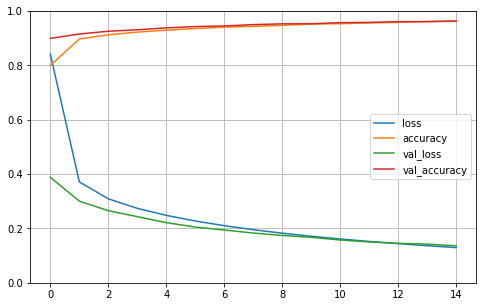

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [33]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9714
test loss, test acc: [0.09450620412826538, 0.9714000225067139]


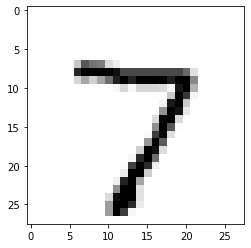

In [34]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [41]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ]], dtype=float32)

In [42]:
predictions.max()

0.998

In [43]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [44]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [45]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(input_shape = X_train.shape[1:],
                      units = 30,
                      activation="relu"),
    
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
         y_train,
         epochs=1,
         validation_data = (X_valid, y_valid))

363/363 [==============================] - 1s 1ms/step - loss: 1.7520 - val_loss: 0.5975


In [51]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

model.predict(X_test[:3])

162/162 [==============================] - 0s 663us/step - loss: 0.3259
0.3259105980396271


array([[1.7329999],
       [1.1171376],
       [5.0768604]], dtype=float32)

In [52]:
y_test[:3]

array([2.38   , 0.773  , 5.00001])

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [53]:
model.save("my_keras_model.h5")

In [54]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [56]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    callbacks = [checkpoint_cb]
)

Epoch 1/20
363/363 [==============================] - 0s 809us/step - loss: 0.3150
Epoch 2/20
363/363 [==============================] - 0s 779us/step - loss: 0.3174
Epoch 3/20
363/363 [==============================] - 0s 773us/step - loss: 0.3131
Epoch 4/20
363/363 [==============================] - 0s 735us/step - loss: 0.3134
Epoch 5/20
363/363 [==============================] - 0s 819us/step - loss: 0.3144
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3133
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3131
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3127
Epoch 9/20
363/363 [==============================] - 0s 754us/step - loss: 0.3168
Epoch 10/20
363/363 [==============================] - 0s 762us/step - loss: 0.3138
Epoch 11/20
363/363 [==============================] - 0s 690us/step - loss: 0.3123
Epoch 12/20
363/363 [==============================] - 0s 945us/step - loss: 0.3213
Epoch 1

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [61]:
del model

In [65]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                 restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks = [checkpoint_cb, early_stopping_cb],
    validation_data = (X_valid, y_valid)
)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3141 - val_loss: 0.3211
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3139 - val_loss: 0.3300
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3141 - val_loss: 0.3210
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3153 - val_loss: 0.3199
Epoch 5/100
363/363 [==============================] - 0s 979us/step - loss: 0.3143 - val_loss: 0.3311
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3132 - val_loss: 0.3189
Epoch 7/100
363/363 [==============================] - 0s 988us/step - loss: 0.3135 - val_loss: 0.3334
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3130 - val_loss: 0.3259
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3132 - val_loss: 0.3319


### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

In [66]:
import os

# Crea este directorio
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Guarda una carpeta nueva con la fecha de la ejecucion
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [67]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3129 - val_loss: 0.3223
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3139 - val_loss: 0.3185
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3135 - val_loss: 0.3205
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3141 - val_loss: 0.3272
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3162 - val_loss: 0.3234
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3138 - val_loss: 0.3172
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3119 - val_loss: 0.3285
Epoch 8/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3124 - val_loss: 0.3239
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3160 - val_loss: 0.3208
Epoch 10/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3202 - val_loss: 0.3219

In [ ]:
'''
Para lanzarlo desde el jupyter notebook
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Para lanzarlo desde el terminal, hay que estar en la carpeta de los logs
tensorboard --logdir=./my_logs --port=6006

'''